<a href="https://colab.research.google.com/github/TimothyAndrewChowles/Coursework/blob/main/EvaluationMetrics-GainLift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

np.random.seed(42)
predicted_probabilities = np.random.rand(100)
actual_labels = (predicted_probabilities > 0.5).astype(int)
df = pd.DataFrame({'predicted_probabilities': predicted_probabilities,
                   'actual_labels': actual_labels})

display(df.head())

,predicted_probabilities,actual_labels
0,0.374540,0
1,0.950714,1
2,0.731994,1
3,0.598658,1
4,0.156019,0


In [ ]:
df_sorted = df.sort_values('predicted_probabilities',
                           ascending=False).reset_index(drop=True)

df_sorted['cumulative_actual'] = df_sorted['actual_labels'].cumsum()
df_sorted['cumulative_random'] = df_sorted['actual_labels'].mean() * \
                                 (df_sorted.index + 1)

total_actual_positives = df_sorted['actual_labels'].sum()
df_sorted['gain'] = df_sorted['cumulative_actual'] / \
                     total_actual_positives
df_sorted['lift'] = df_sorted['cumulative_actual'] / \
                     df_sorted['cumulative_random']

display(df_sorted.head())

,predicted_probabilities,actual_labels,cumulative_actual,cumulative_random,gain,lift
0,0.986887,1,1,0.47,0.021277,2.12766
1,0.969910,1,2,0.94,0.042553,2.12766
2,0.969585,1,3,1.41,0.063830,2.12766
3,0.965632,1,4,1.88,0.085106,2.12766
4,0.950714,1,5,2.35,0.106383,2.12766


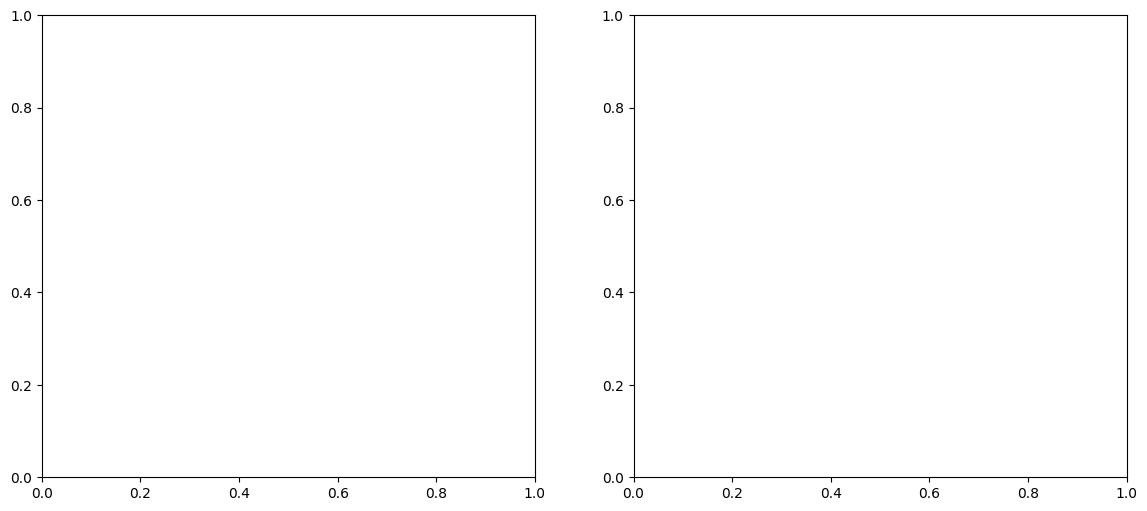

Text(0.5, 1.0, 'Lift Chart')

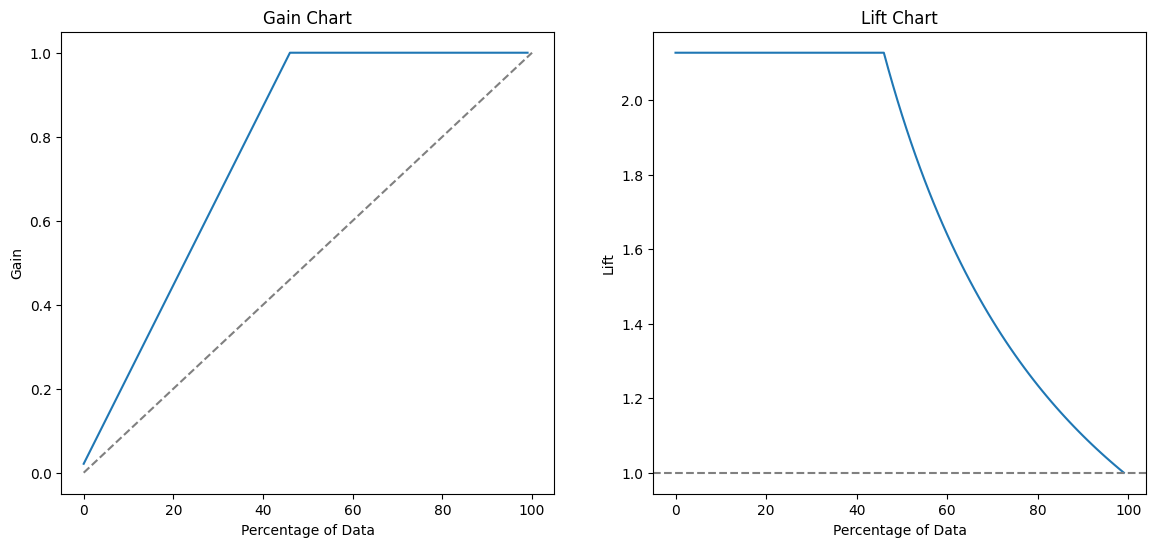

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].plot(df_sorted.index / len(df_sorted) * 100, df_sorted['gain'])
axes[0].plot([0, 100], [0, 1], linestyle='--', color='gray')
axes[0].set_xlabel('Percentage of Data')
axes[0].set_ylabel('Gain')
axes[0].set_title('Gain Chart')

axes[1].plot(df_sorted.index / len(df_sorted) * 100, df_sorted['lift'])
axes[1].axhline(y=1, color='gray', linestyle='--')
axes[1].set_xlabel('Percentage of Data')
axes[1].set_ylabel('Lift')
axes[1].set_title('Lift Chart')


First, you'll need to clone your GitHub repository into the Colab environment. Replace `<your_username>` and `<your_repository>` with your actual GitHub username and repository name.

In [ ]:
!git clone https://github.com/TimothyAndrewChowles/Coursework.git

Cloning into 'Coursework'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 14 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (14/14), 14.49 KiB | 1.81 MiB/s, done.
Resolving deltas: 100% (2/2), done.


Next, navigate into the cloned repository directory.

In [ ]:
import os
os.chdir('Coursework')

Now, you can copy your notebook file into this directory. You might need to adjust the source path if your notebook is not in the default Colab content directory.

In [ ]:
!cp /content/Coursework/Business-Analytics-for-Artificial-Intelligence/EvaluationMatrix.ipynb .

cp: missing destination file operand after '/content/Coursework/Business-Analytics-for-Artificial-Intelligence/EvaluationMetrics-GainLift.ipynb'
Try 'cp --help' for more information.


Add the notebook file to the staging area.

In [ ]:
!git add EvaluationMetrics-GainLift.ipynb

Commit the changes.

In [ ]:
!git commit -m "Add Colab notebook"

Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@2fb6d051387d.(none)')


Finally, push the changes to your GitHub repository. You might be prompted to enter your GitHub credentials.

In [ ]:
!git push origin main

fatal: could not read Username for 'https://github.com': No such device or address
